# Task 06: Prediction using Decision Tree Algorithm

## Author: Rupali Shekhawat

### Problem Statement: Create the Decision Tree classifier and visualize it graphically. The dataset is taken from: https://bit.ly/3kXTdox


### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

### Loading the IRIS dataset

In [2]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dropping redundant values

In [3]:
#Dropping Unneccessary Column
iris_df = iris_df.drop(["Id"], axis = "columns") 
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Columns of the dataframe

In [4]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Data Preprocessing

In [5]:
x = iris_df.iloc[:,0:4].values
y = iris_df['Species'].values

print(x.shape)
print(y.shape)

(150, 4)
(150,)


### Splitting Training and Testing Data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 82)

In [7]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred = dtree.predict(x_test)
print(y_pred)
print('Decision Tree Classifer Created')

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']
Decision Tree Classifer Created


### Evaluating the model

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy of our model is ' + str(round(accuracy,2))+'%.')

[[11  0  0]
 [ 0  8  1]
 [ 0  2  8]]
Accuracy of our model is 90.0%.


### Cross Validating

In [9]:
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(dtree,x_train,y_train,cv =5)
print(cv_accuracy)
print("Accuracy of Model with Cross Validation is "+ str(round(cv_accuracy.mean() * 100)) +'%.')

[0.875      1.         1.         0.91666667 0.91666667]
Accuracy of Model with Cross Validation is 94.0%.


### Decision Tree Visualization

#### Textual Visualization

In [10]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



#### Graphical Visualization

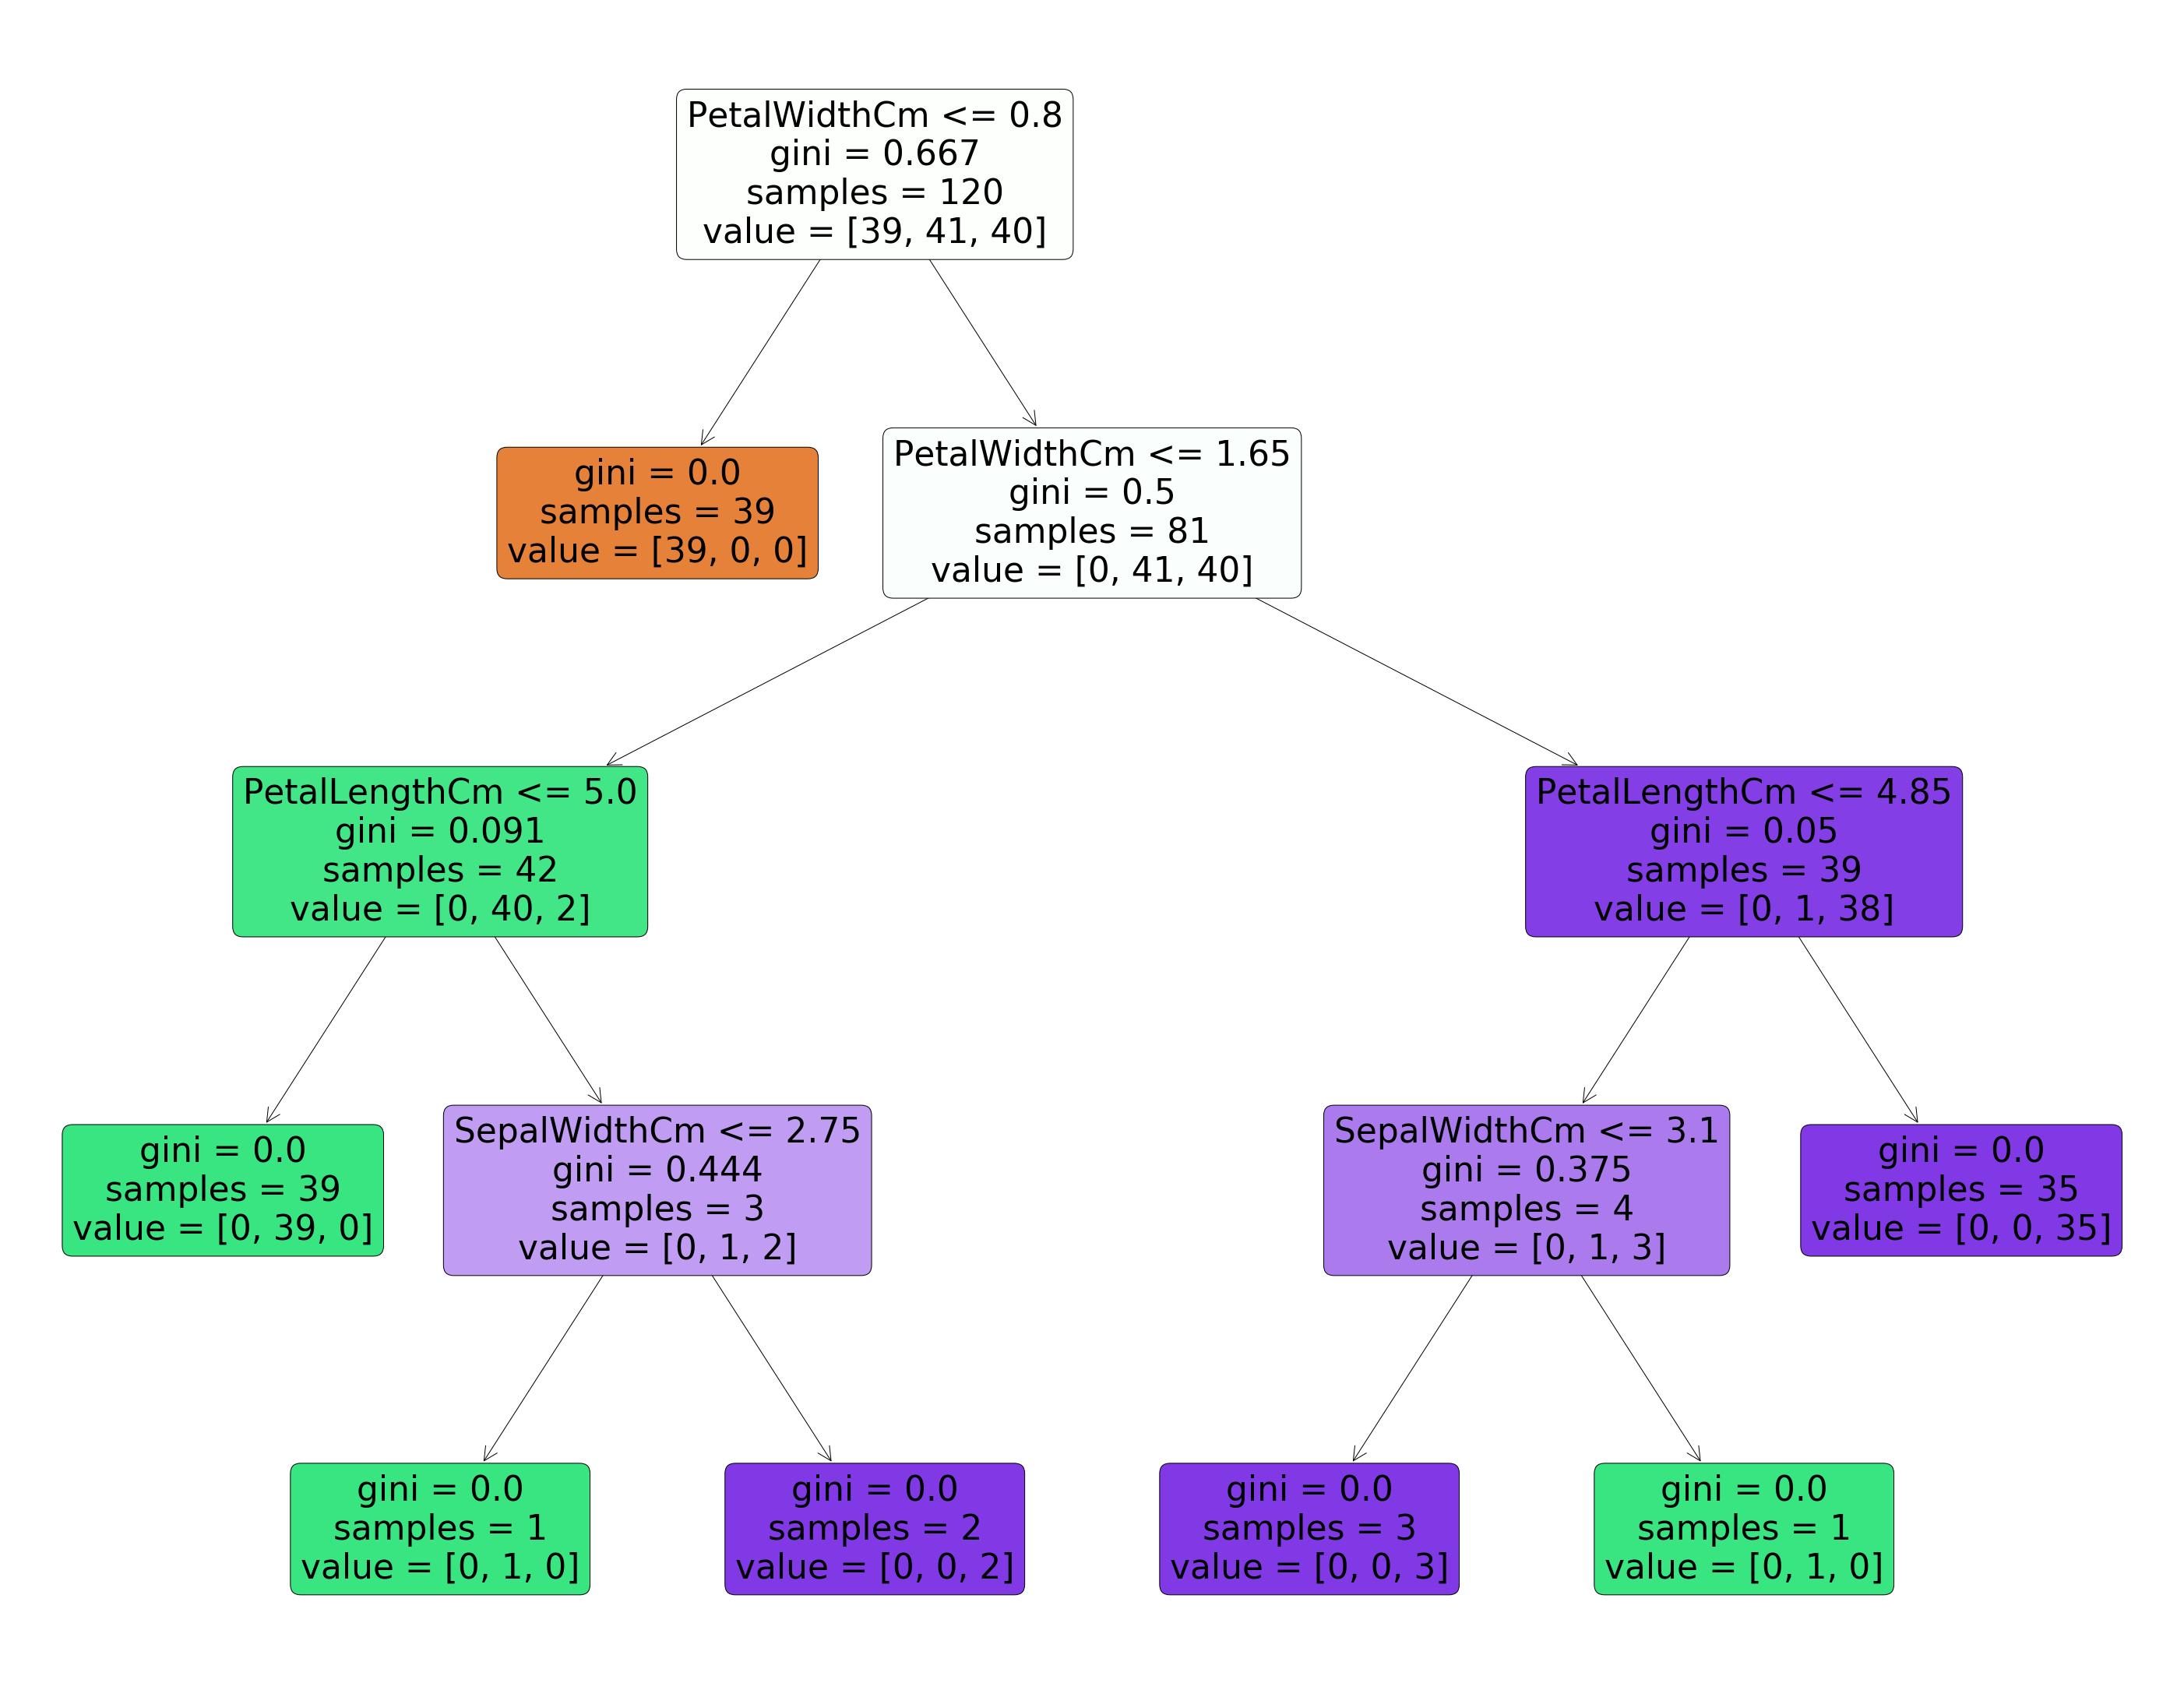

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize =(50,40))
plt.style.use("grayscale")
plot_tree(dtree, rounded= True, filled =True, feature_names = iris_df.columns)
plt.show()